# 0. 기본 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [314]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential


%matplotlib inline

In [355]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. 데이터 분석
### 1-1. 이미지 데이터 정보 확인하기

In [356]:
DATA_PATH = './German-Traffic-Sign/'

In [357]:
file_list = os.listdir(DATA_PATH)
file_list

['.DS_Store', 'Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']

### Meta
Meta 파일은 레이블당 하나의 샘플 이미지를 보여주는 파일입니다.

In [358]:
df_Meta = pd.read_csv(DATA_PATH + 'Meta.csv')
df_Meta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


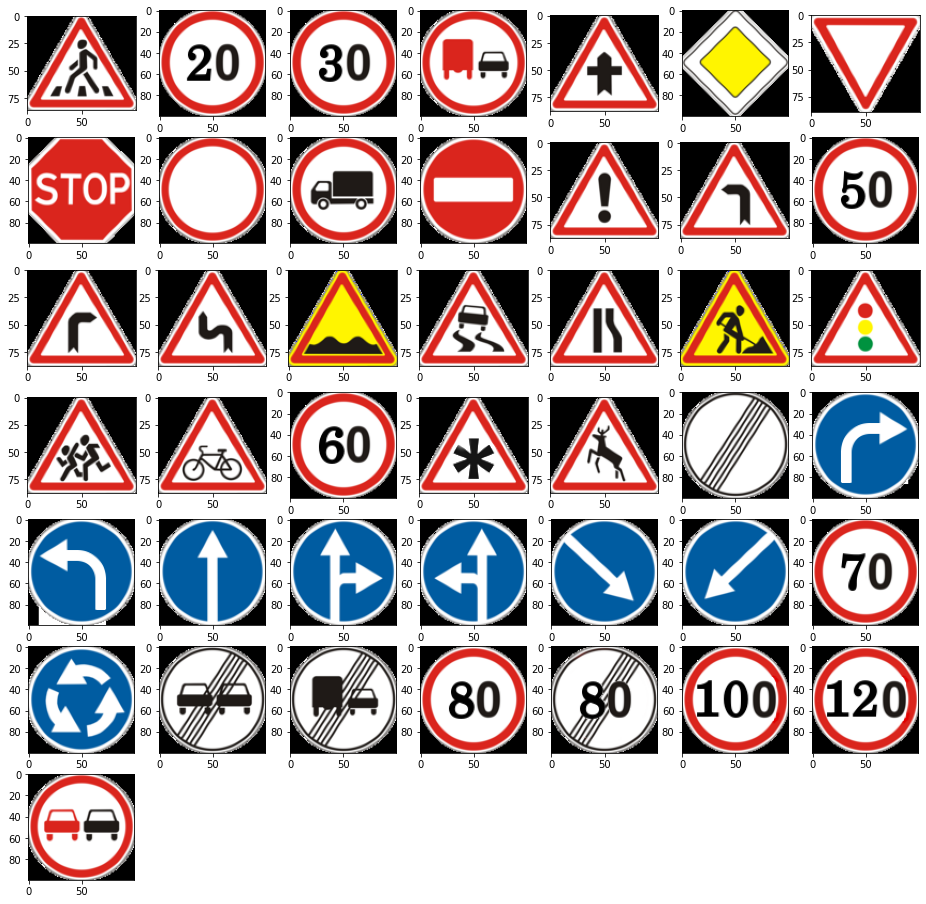

In [359]:
Meta_images = []
Meta_labels = []

plt.figure(figsize=(16,16))
for i in range(len(df_Meta)):
    img = load_img(DATA_PATH + df_Meta['Path'][i])
    plt.subplot(7, 7, i+1)
    plt.imshow(img)
    Meta_images.append(img)
    Meta_labels.append(df_Meta['ClassId'])

### Train

In [360]:
df_Train = pd.read_csv(DATA_PATH + 'Train.csv')
df_Train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


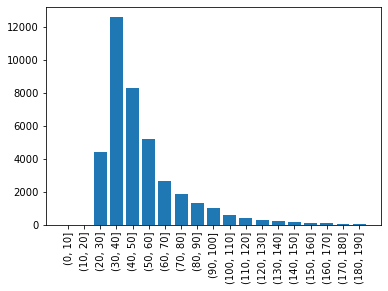

(0, 10]           0
(10, 20]          0
(20, 30]       4425
(30, 40]      12561
(40, 50]       8285
(50, 60]       5169
(60, 70]       2658
(70, 80]       1845
(80, 90]       1287
(90, 100]      1007
(100, 110]      598
(110, 120]      426
(120, 130]      298
(130, 140]      212
(140, 150]      165
(150, 160]       99
(160, 170]       70
(170, 180]       39
(180, 190]       21
Name: Width, dtype: int64

In [361]:
dist = pd.cut(df_Train['Width'], np.arange(0,200,10)).value_counts(sort=False)
plt.bar(dist.index.astype(str), dist.values)
plt.xticks(rotation=90)
plt.show()

dist

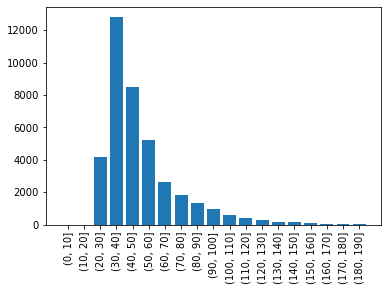

(0, 10]           0
(10, 20]          0
(20, 30]       4159
(30, 40]      12797
(40, 50]       8530
(50, 60]       5208
(60, 70]       2635
(70, 80]       1817
(80, 90]       1338
(90, 100]       937
(100, 110]      577
(110, 120]      405
(120, 130]      295
(130, 140]      188
(140, 150]      134
(150, 160]       80
(160, 170]       42
(170, 180]       32
(180, 190]        8
Name: Height, dtype: int64

In [362]:
dist = pd.cut(df_Train['Height'], np.arange(0,200,10)).value_counts(sort=False)
plt.bar(dist.index.astype(str), dist.values)
plt.xticks(rotation=90)
plt.show()

dist

### 이미지 사이즈 => interpolation : bilinear
128 x 128 : test accuracy 91%, 250ms/step  
64 x 64 : test accuracy 90.9%, 80ms/step   
32 x 32 : test accuracy 88.8%, 22ms/step    
16 x 16 : test accuracy 79.7%, 22ms/step

In [363]:
image_height = 64
image_width = 64
image_channel = 3 # 컬러 이미지이기에 3채널

### Test

In [364]:
df_Test = pd.read_csv(DATA_PATH + 'Test.csv')
df_Test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


# 2. 데이터 전처리
### 2-1. 이미지 데이터 Generator 만들기

In [365]:
df_Train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [366]:
df_Train['ClassId'] = df_Train['ClassId'].astype(str)
df_Test['ClassId'] = df_Test['ClassId'].astype(str)

In [367]:
df_Train, df_Valid = train_test_split(df_Train, test_size=0.2)

In [368]:
df_Train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
35810,46,46,6,6,41,41,37,Train/37/00037_00000_00021.png
33578,40,43,6,6,35,38,33,Train/33/00033_00016_00008.png
9206,42,42,5,5,37,37,5,Train/5/00005_00025_00026.png
11692,61,62,5,6,55,56,7,Train/7/00007_00032_00022.png
1511,40,39,6,6,34,34,1,Train/1/00001_00031_00011.png
...,...,...,...,...,...,...,...,...
30674,48,48,5,5,43,43,27,Train/27/00027_00003_00014.png
38450,58,58,5,5,53,53,40,Train/40/00040_00002_00021.png
4555,49,48,5,5,43,42,2,Train/2/00002_00058_00025.png
39132,32,33,5,5,27,27,42,Train/42/00042_00005_00013.png


In [369]:
df_Valid

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
13451,34,33,5,6,29,28,8,Train/8/00008_00043_00011.png
34526,77,80,7,8,71,73,35,Train/35/00035_00010_00027.png
9382,45,45,6,5,40,40,5,Train/5/00005_00031_00022.png
27695,28,28,6,6,23,22,23,Train/23/00023_00000_00005.png
27725,74,70,7,7,68,64,23,Train/23/00023_00001_00005.png
...,...,...,...,...,...,...,...,...
1064,46,45,6,5,40,39,1,Train/1/00001_00016_00014.png
5430,29,29,6,6,24,24,3,Train/3/00003_00013_00000.png
26504,44,40,6,5,39,35,18,Train/18/00018_00031_00014.png
15352,48,48,6,6,43,43,10,Train/10/00010_00010_00022.png


# data augmentation
기본 : test accuracy 87.8%, 33ms/step     
\+ brightness_range : test accuracy 88.8%, 33ms/step    
\+ zoom_range / rotation_range : test accuracy 92%

In [370]:
datagen_kwargs = dict(rescale=1./255)
dataflow_kwargs = dict(target_size=(image_height, image_width), 
                       batch_size=32,
                       directory=DATA_PATH, 
                       x_col='Path', 
                       y_col='ClassId' ,
                       class_mode='sparse',
                       interpolation='bilinear',
                       brightness_range=[0.6,1.0]
                      )

# Train
train_datagen = ImageDataGenerator(
#     shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 20,
    **datagen_kwargs
)

train_generator = train_datagen.flow_from_dataframe(
        df_Train, 
        **dataflow_kwargs
)

# Validation
valid_datagen = ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_dataframe(
    df_Valid, 
    shuffle=False, 
    **dataflow_kwargs
)

# Test
test_datagen = ImageDataGenerator(**datagen_kwargs)
test_generator = test_datagen.flow_from_dataframe(
    df_Test, 
    shuffle=False, 
    **dataflow_kwargs
)

Found 31367 validated image filenames belonging to 43 classes.
Found 7842 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.


# 3. 딥러닝 모델
### 3-1. CNN 모델 설정
마지막에서 두 번째 Dense units=512 : test accuracy 88.8%, 33ms/step   
마지막에서 두 번째 Dense units=128 : test accuracy 88.8%, 22ms/step   

Conv + Pooling 세 층 : test accuracy 88.8%  
Conv + Pooling 두 층 : test accuracy 88.8%    
Conv + Pooling 한 층 : test accuracy 86.15%

In [371]:
model = Sequential([
    Input((image_height, image_width, image_channel)),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(43, activation='softmax')
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8388736   
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

### 3-2. 학습 수행

### optimizer
SGD : test accuracy 88.8%    
Momentum 0.9 : test accuracy 95.6%   
Adam : test accuracy 5.9%

In [372]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

In [ ]:
with tf.device('/device:GPU:0'):
  # 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 
  # 성능을 확인해보고 값을 증가 시켜 봅시다. 
  EPOCHS = 10

  # EPOCHS에 따른 성능을 보기 위하여 history 사용
  history = model.fit(
      train_generator,
      validation_data = valid_generator, # validation 데이터 사용
      epochs=EPOCHS
  )

Epoch 1/10
981/981 [==============================] - 496s 506ms/step - loss: 0.7282 - accuracy: 0.7658 - val_loss: 0.2685 - val_accuracy: 0.9169
Epoch 2/10
981/981 [==============================] - 518s 527ms/step - loss: 0.4203 - accuracy: 0.8656 - val_loss: 0.1444 - val_accuracy: 0.9592
Epoch 3/10
809/981 [=======================>......] - ETA: 1:20 - loss: 0.3035 - accuracy: 0.9072

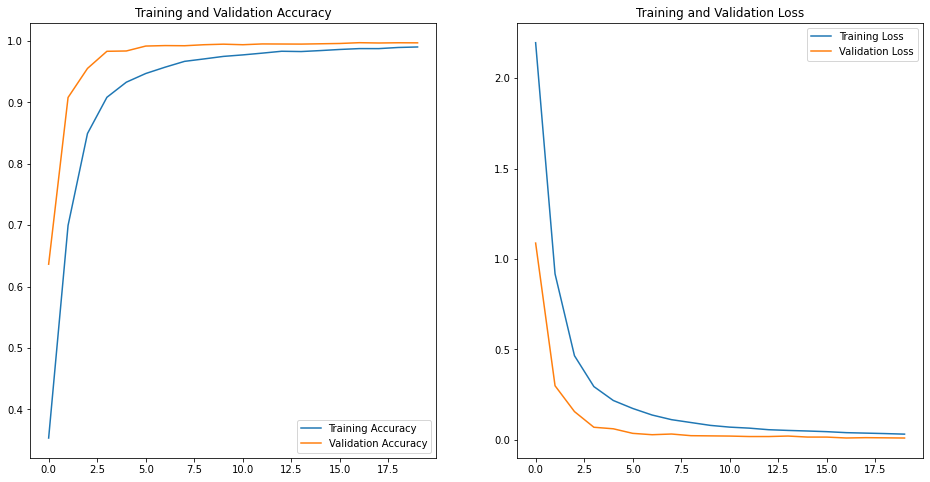

In [334]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### train data보다 valid data의 정확도가 떨어지는 이유 ?
train data의 경우 data augmentation를 적용하기 때문에 데이터에 무작위 변환을 하면 분류하기가 더 어려워 질 수 있다.    

### 3-3. 모델 성능 평가 및 예측

In [335]:
test_loss, test_accuracy = model.evaluate(test_generator)

print('test set accuracy: ', test_accuracy)

395/395 [==============================] - 10s 25ms/step - loss: 0.1655 - accuracy: 0.9652
test set accuracy:  0.9652414917945862


(32, 32, 32, 3)


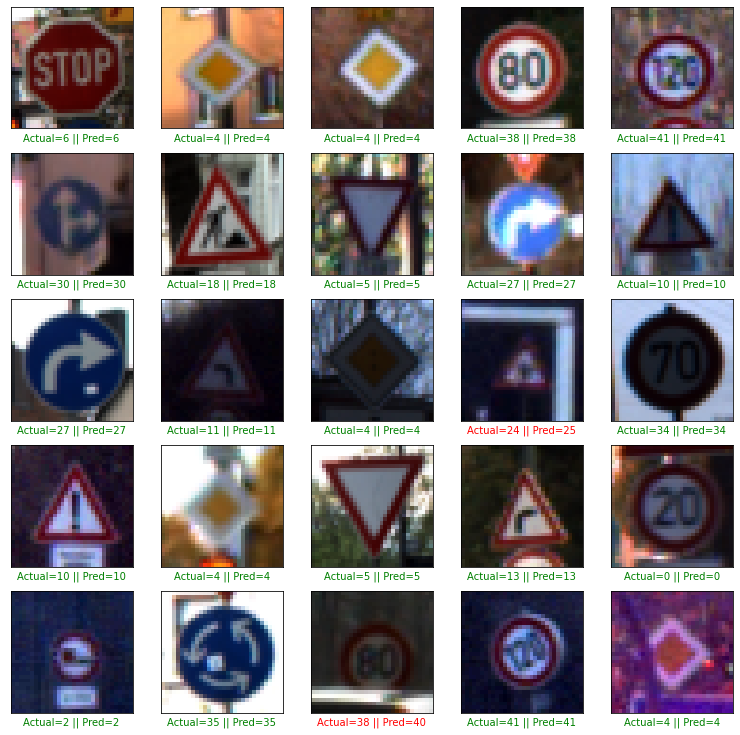

In [345]:
plt.figure(figsize = (13, 13))
x_test, y_test = test_generator.next()
pred_test = model.predict_on_batch(x_test)
pred_class = np.argmax(pred_test, axis=-1)

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_class[start_index + i]
    actual = int(y_test[start_index + i])
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(x_test[start_index + i]))
plt.show()

In [141]:
test_prediction = model.predict(test_generator)
predicted_class = np.argmax(test_prediction, axis=-1)

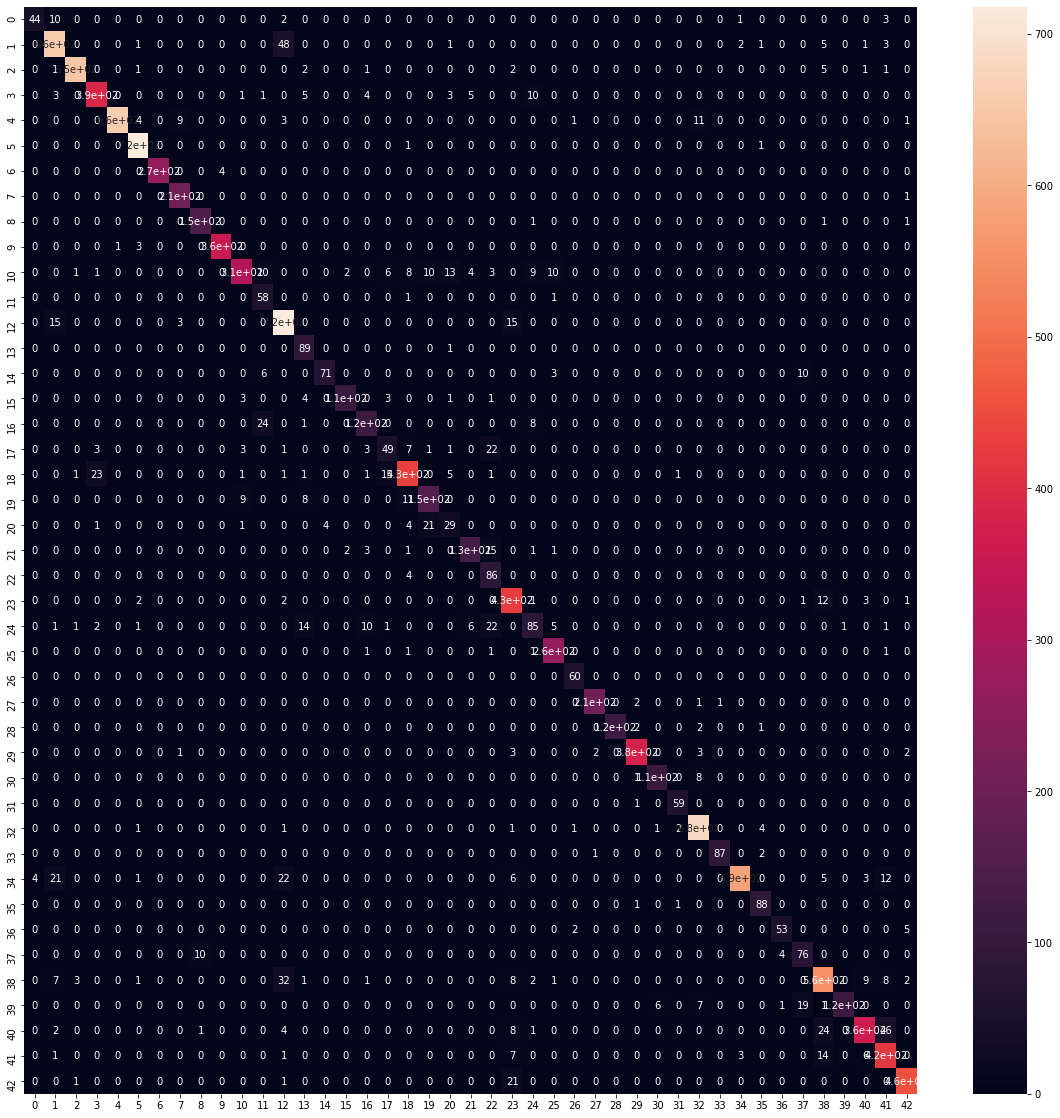

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        60
           1       0.92      0.91      0.91       720
           2       0.99      0.98      0.98       660
           3       0.93      0.92      0.93       420
           4       1.00      0.96      0.98       690
           5       0.98      1.00      0.99       720
           6       1.00      0.99      0.99       270
           7       0.94      1.00      0.97       210
           8       0.93      0.98      0.95       150
           9       0.99      0.99      0.99       360
          10       0.95      0.80      0.87       390
          11       0.59      0.97      0.73        60
          12       0.86      0.96      0.90       750
          13       0.71      0.99      0.83        90
          14       0.95      0.79      0.86        90
          15       0.96      0.90      0.93       120
          16       0.83      0.78      0.80       150
          17       0.66    

In [341]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_generator.labels, predicted_class)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)
plt.show()
print(classification_report(test_generator.labels, predicted_class))

# 4. VGGNet


In [10]:
def conv(filters, kernel_size = 3, activation= tf.nn.relu, padding= 'same'):
    return keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, activation= activation, padding= padding)


In [11]:
model = keras.Sequential()

img_size = 32

# 첫 번째 Conv Block
# 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다
model.add(Input((img_size, img_size, 3)))
model.add(conv(64))
model.add(conv(64))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 두 번째 Conv Block
model.add(conv(128))
model.add(conv(128))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 세 번째 Conv Block
model.add(conv(256))
model.add(conv(256))
model.add(conv(256))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 네 번째 Conv Block
model.add(conv(512))
model.add(conv(512))
model.add(conv(512))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 다섯 번째 Conv Block
model.add(conv(512))
model.add(conv(512))
model.add(conv(512))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# Fully Connected Layer
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
model.add(keras.layers.Dense(512, activation= tf.nn.relu))
model.add(keras.layers.Dense(58, activation= tf.nn.softmax))
  
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)        

# 5. ResNet
### 정확도 : 

In [ ]:
def conv(filters, kernel_size = 3, activation= tf.nn.relu, padding= 'same'):
    return keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, activation= activation, padding= padding)


with tf.device('/device:GPU:0'):

  img_size = 512

  # Sequential 모델 선언
  model = keras.Sequential()
    
  '''
  지시사항 1번
  3 x 3 convolution만을 사용하여 VGG16 Net을 완성하세요.
  '''
  # 첫 번째 Conv Block
  # 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다
  model.add(Input((img_size, img_size, 3)))
  model.add(conv(64))
  model.add(conv(64))
  model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
  
  # 두 번째 Conv Block
  model.add(conv(128))
  model.add(conv(128))
  model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
  
  # 세 번째 Conv Block
  model.add(conv(256))
  model.add(conv(256))
  model.add(conv(256))
  model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
  
  # 네 번째 Conv Block
  model.add(conv(512))
  model.add(conv(512))
  model.add(conv(512))
  model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
  
  # 다섯 번째 Conv Block
  model.add(conv(512))
  model.add(conv(512))
  model.add(conv(512))
  model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
  
  # Fully Connected Layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
  model.add(keras.layers.Dense(512, activation= tf.nn.relu))
  model.add(keras.layers.Dense(58, activation= tf.nn.softmax))

  train_images, test_images, train_labels, test_labels = get_images_and_preprocessing(512)

  print(train_images.shape)
  print(type(train_images))
  
  
  # 지시사항 2에서 설정한 모델을 불러옵니다.
  model = VGG16(512)
  
  # 모델의 구조를 확인합니다.
  model.summary()
  
  # 컴파일러를 설정합니다.
  optimizer = tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  
  # fit 함수를 사용하여 모델을 학습합니다.
  # 학습 수행 시 정보는 history에 저장합니다.
  history = model.fit(train_images,train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose = 2)
  
  # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
  loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
  
  print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
  print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
  
  Visualize([('VGGNet', history)], 'loss')
    
  Plotter(test_images, model)
    
